In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model_2 as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader

In [2]:
# print gpu
torch.cuda.set_device(1)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 1
8
(6, 1)
1.0.0


In [3]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:1')
else:
    device = "cpu"
print(device)

cuda:1


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.Normalize(),
                                               dt.ToTensor()
                                           ]))
# TODO: change the normalization parameters

In [5]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=50,
                        shuffle=True, num_workers=0)

0 torch.Size([50, 3, 96, 96]) torch.Size([50, 96, 96])
1 torch.Size([50, 3, 96, 96]) torch.Size([50, 96, 96])
2 torch.Size([50, 3, 96, 96]) torch.Size([50, 96, 96])
3 torch.Size([50, 3, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


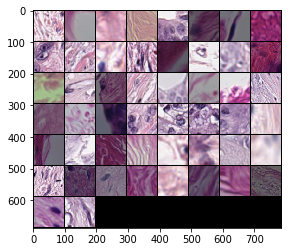

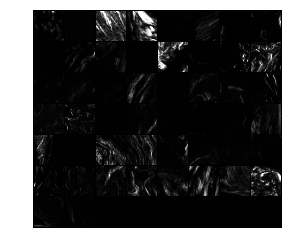

In [7]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [6]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


===> Building model


In [8]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = -(ssim(output, targetf)-1)
        
        p = 0.75
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [9]:
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.24992838501930237 lossSSIM: 0.9589375853538513
===> Epoch[1](0/16220): Loss: 0.4272
lossMSE: 0.19900520145893097 lossSSIM: 0.9481278657913208
===> Epoch[1](50/16220): Loss: 0.3863
lossMSE: 0.17976948618888855 lossSSIM: 0.9383274912834167
===> Epoch[1](100/16220): Loss: 0.3694
lossMSE: 0.1757466346025467 lossSSIM: 0.9398916363716125
===> Epoch[1](150/16220): Loss: 0.3668
lossMSE: 0.16854523122310638 lossSSIM: 0.9421859979629517
===> Epoch[1](200/16220): Loss: 0.3620
lossMSE: 0.15771430730819702 lossSSIM: 0.9344590902328491
===> Epoch[1](250/16220): Loss: 0.3519
lossMSE: 0.14639316499233246 lossSSIM: 0.9332117438316345
===> Epoch[1](300/16220): Loss: 0.3431
lossMSE: 0.13342994451522827 lossSSIM: 0.9230151772499084
===> Epoch[1](350/16220): Loss: 0.3308
lossMSE: 0.12887176871299744 lossSSIM: 0.9221935272216797
===> Epoch[1](400/16220): Loss: 0.3272
lossMSE: 0.1271667778491974 lossSSIM: 0.936475396156311
===> Epoch[1](450/16220): Loss: 0.3295
lossMSE: 0.1145583763718605 lossSSIM

lossMSE: 0.027500685304403305 lossSSIM: 0.37200814485549927
===> Epoch[1](4200/16220): Loss: 0.1136
lossMSE: 0.027686670422554016 lossSSIM: 0.35027259588241577
===> Epoch[1](4250/16220): Loss: 0.1083
lossMSE: 0.02571374736726284 lossSSIM: 0.3400067687034607
===> Epoch[1](4300/16220): Loss: 0.1043
lossMSE: 0.02400856278836727 lossSSIM: 0.317815899848938
===> Epoch[1](4350/16220): Loss: 0.0975
lossMSE: 0.0341438390314579 lossSSIM: 0.4038398861885071
===> Epoch[1](4400/16220): Loss: 0.1266
lossMSE: 0.028359200805425644 lossSSIM: 0.35811686515808105
===> Epoch[1](4450/16220): Loss: 0.1108
lossMSE: 0.025561777874827385 lossSSIM: 0.32322055101394653
===> Epoch[1](4500/16220): Loss: 0.1000
lossMSE: 0.02550404705107212 lossSSIM: 0.31854259967803955
===> Epoch[1](4550/16220): Loss: 0.0988
lossMSE: 0.02778712287545204 lossSSIM: 0.30395370721817017
===> Epoch[1](4600/16220): Loss: 0.0968
lossMSE: 0.026280390098690987 lossSSIM: 0.29760611057281494
===> Epoch[1](4650/16220): Loss: 0.0941
lossMSE: 0

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 50
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
#             for img in input_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)
                            
#             for img in label_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)                           

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


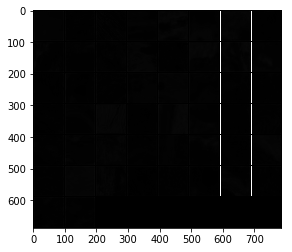

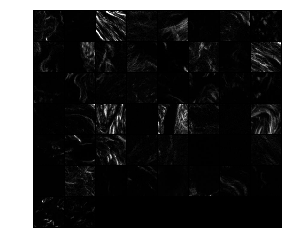

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


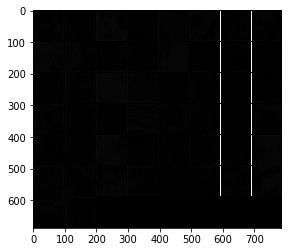

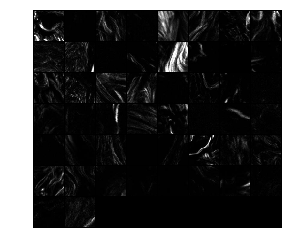

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


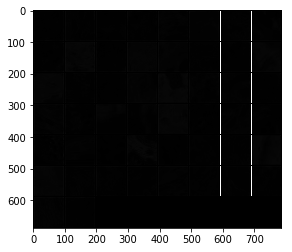

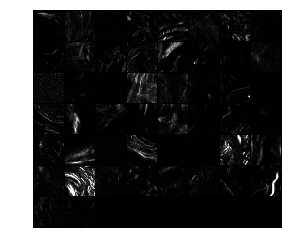

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


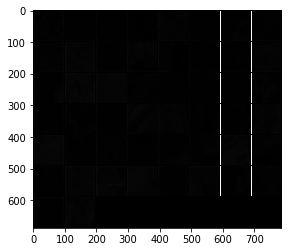

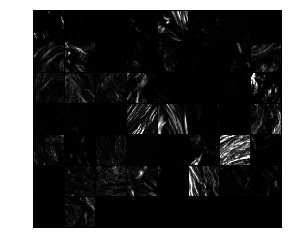

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


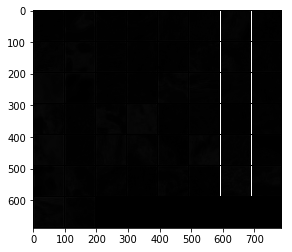

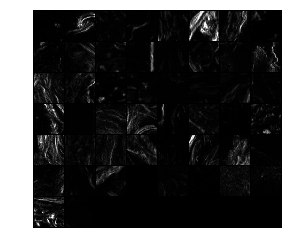

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


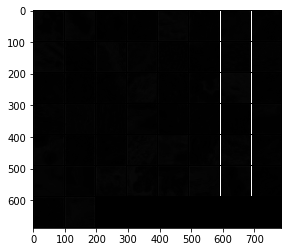

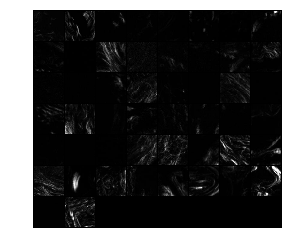

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


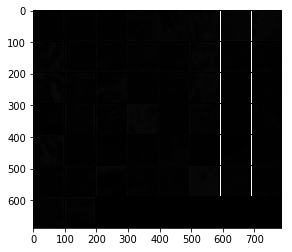

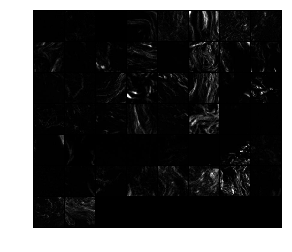

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


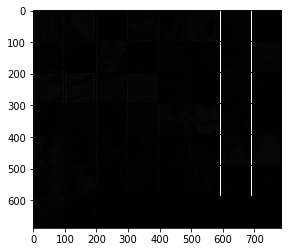

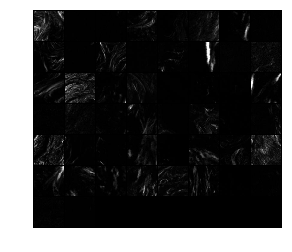

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


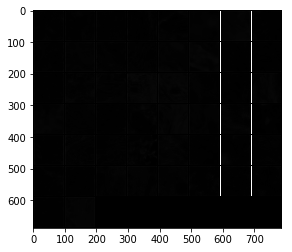

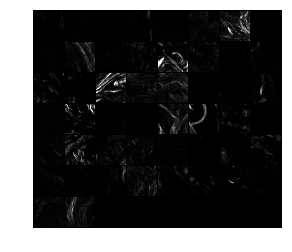

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


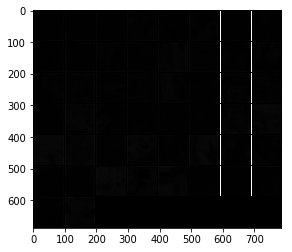

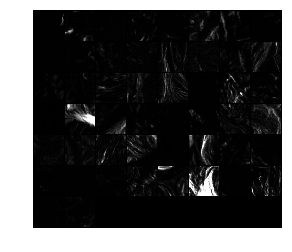

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


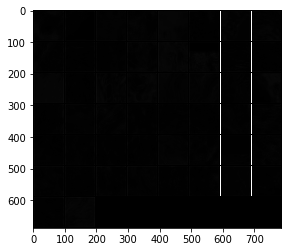

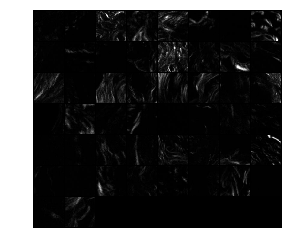

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


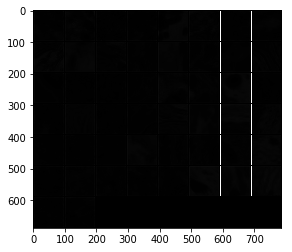

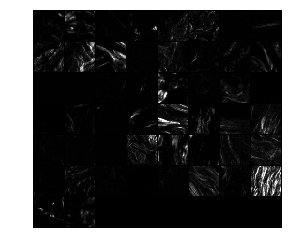

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


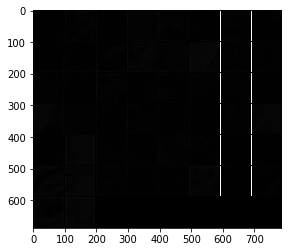

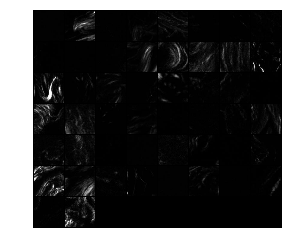

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


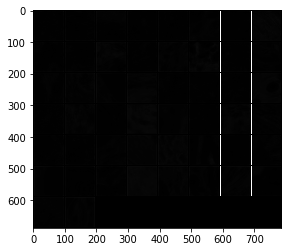

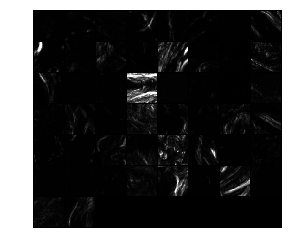

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


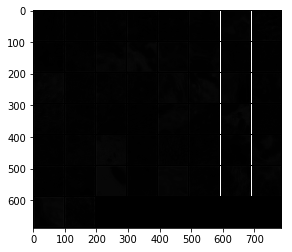

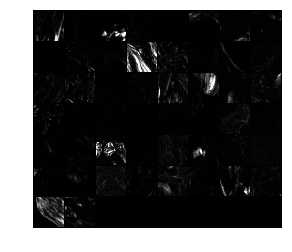

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


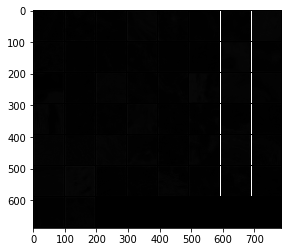

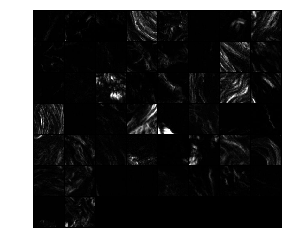

torch.Size([50, 1, 96, 96]) torch.Size([50, 96, 96])
torch.Size([50, 1, 96, 96])


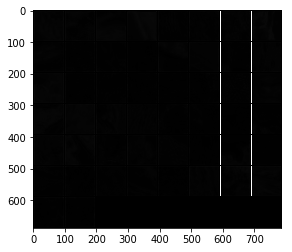

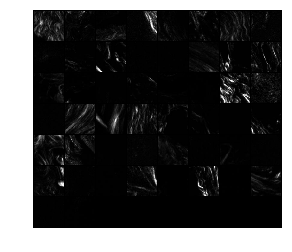

===> Avg. PSNR: nan dB


In [13]:
test()

In [15]:
# restart
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.028027361258864403 lossSSIM: 0.25703269243240356
===> Epoch[1](0/16220): Loss: 0.0853
lossMSE: 0.026702944189310074 lossSSIM: 0.3023834824562073
===> Epoch[1](50/16220): Loss: 0.0956
lossMSE: 0.027356425300240517 lossSSIM: 0.3614357113838196
===> Epoch[1](100/16220): Loss: 0.1109
lossMSE: 0.024235615506768227 lossSSIM: 0.304252564907074
===> Epoch[1](150/16220): Loss: 0.0942
lossMSE: 0.028833914548158646 lossSSIM: 0.3398468494415283
===> Epoch[1](200/16220): Loss: 0.1066
lossMSE: 0.025159651413559914 lossSSIM: 0.30716127157211304
===> Epoch[1](250/16220): Loss: 0.0957
lossMSE: 0.030713852494955063 lossSSIM: 0.28196120262145996
===> Epoch[1](300/16220): Loss: 0.0935
lossMSE: 0.02845912054181099 lossSSIM: 0.34400635957717896
===> Epoch[1](350/16220): Loss: 0.1073
lossMSE: 0.028567669913172722 lossSSIM: 0.3339862823486328
===> Epoch[1](400/16220): Loss: 0.1049
lossMSE: 0.030445847660303116 lossSSIM: 0.40522241592407227
===> Epoch[1](450/16220): Loss: 0.1241
lossMSE: 0.025898389

lossMSE: 0.03399118781089783 lossSSIM: 0.2974395751953125
===> Epoch[1](4200/16220): Loss: 0.0999
lossMSE: 0.02482355572283268 lossSSIM: 0.3029361367225647
===> Epoch[1](4250/16220): Loss: 0.0944
lossMSE: 0.027702897787094116 lossSSIM: 0.3093474507331848
===> Epoch[1](4300/16220): Loss: 0.0981
lossMSE: 0.02395079843699932 lossSSIM: 0.2675780653953552
===> Epoch[1](4350/16220): Loss: 0.0849
lossMSE: 0.02340465597808361 lossSSIM: 0.26199907064437866
===> Epoch[1](4400/16220): Loss: 0.0831
lossMSE: 0.027815314009785652 lossSSIM: 0.2838994860649109
===> Epoch[1](4450/16220): Loss: 0.0918
lossMSE: 0.03406824916601181 lossSSIM: 0.36492758989334106
===> Epoch[1](4500/16220): Loss: 0.1168
lossMSE: 0.02511945553123951 lossSSIM: 0.3167228102684021
===> Epoch[1](4550/16220): Loss: 0.0980
lossMSE: 0.030221104621887207 lossSSIM: 0.30474019050598145
===> Epoch[1](4600/16220): Loss: 0.0989
lossMSE: 0.025257065892219543 lossSSIM: 0.3579113483428955
===> Epoch[1](4650/16220): Loss: 0.1084
lossMSE: 0.02

lossMSE: 0.01737334579229355 lossSSIM: 0.293027400970459
===> Epoch[1](8350/16220): Loss: 0.0863
lossMSE: 0.015506602823734283 lossSSIM: 0.2943570613861084
===> Epoch[1](8400/16220): Loss: 0.0852
lossMSE: 0.017696471884846687 lossSSIM: 0.2874022126197815
===> Epoch[1](8450/16220): Loss: 0.0851
lossMSE: 0.01488651055842638 lossSSIM: 0.2738046646118164
===> Epoch[1](8500/16220): Loss: 0.0796
lossMSE: 0.014199909754097462 lossSSIM: 0.29404616355895996
===> Epoch[1](8550/16220): Loss: 0.0842
lossMSE: 0.01895221695303917 lossSSIM: 0.32840514183044434
===> Epoch[1](8600/16220): Loss: 0.0963
lossMSE: 0.01679655909538269 lossSSIM: 0.29659730195999146
===> Epoch[1](8650/16220): Loss: 0.0867
lossMSE: 0.01526574045419693 lossSSIM: 0.27039843797683716
===> Epoch[1](8700/16220): Loss: 0.0790
lossMSE: 0.012638552114367485 lossSSIM: 0.24103349447250366
===> Epoch[1](8750/16220): Loss: 0.0697
lossMSE: 0.01642461121082306 lossSSIM: 0.2827994227409363
===> Epoch[1](8800/16220): Loss: 0.0830
lossMSE: 0.0

lossMSE: 0.007080657407641411 lossSSIM: 0.2988855242729187
===> Epoch[1](12500/16220): Loss: 0.0800
lossMSE: 0.005754412151873112 lossSSIM: 0.29723256826400757
===> Epoch[1](12550/16220): Loss: 0.0786
lossMSE: 0.007885312661528587 lossSSIM: 0.30912792682647705
===> Epoch[1](12600/16220): Loss: 0.0832
lossMSE: 0.006138478871434927 lossSSIM: 0.294081449508667
===> Epoch[1](12650/16220): Loss: 0.0781
lossMSE: 0.008532164618372917 lossSSIM: 0.33998286724090576
===> Epoch[1](12700/16220): Loss: 0.0914
lossMSE: 0.006787505466490984 lossSSIM: 0.27817440032958984
===> Epoch[1](12750/16220): Loss: 0.0746
lossMSE: 0.006231189239770174 lossSSIM: 0.2860484719276428
===> Epoch[1](12800/16220): Loss: 0.0762
lossMSE: 0.0063611906953155994 lossSSIM: 0.2767940163612366
===> Epoch[1](12850/16220): Loss: 0.0740
lossMSE: 0.006229163147509098 lossSSIM: 0.28434890508651733
===> Epoch[1](12900/16220): Loss: 0.0758
lossMSE: 0.010052206926047802 lossSSIM: 0.307411789894104
===> Epoch[1](12950/16220): Loss: 0.0

lossMSE: 0.007159683387726545 lossSSIM: 0.24931126832962036
===> Epoch[2](350/16220): Loss: 0.0677
lossMSE: 0.012805202975869179 lossSSIM: 0.28040391206741333
===> Epoch[2](400/16220): Loss: 0.0797
lossMSE: 0.0033352389000356197 lossSSIM: 0.27489715814590454
===> Epoch[2](450/16220): Loss: 0.0712
lossMSE: 0.007208365481346846 lossSSIM: 0.2933500409126282
===> Epoch[2](500/16220): Loss: 0.0787
lossMSE: 0.008034956641495228 lossSSIM: 0.31624823808670044
===> Epoch[2](550/16220): Loss: 0.0851
lossMSE: 0.00765798706561327 lossSSIM: 0.3024369478225708
===> Epoch[2](600/16220): Loss: 0.0814
lossMSE: 0.006772337015718222 lossSSIM: 0.28585541248321533
===> Epoch[2](650/16220): Loss: 0.0765
lossMSE: 0.006189869251102209 lossSSIM: 0.280208945274353
===> Epoch[2](700/16220): Loss: 0.0747
lossMSE: 0.00459156883880496 lossSSIM: 0.27408337593078613
===> Epoch[2](750/16220): Loss: 0.0720
lossMSE: 0.010152893140912056 lossSSIM: 0.3493916988372803
===> Epoch[2](800/16220): Loss: 0.0950
lossMSE: 0.00453

lossMSE: 0.003608328988775611 lossSSIM: 0.26013749837875366
===> Epoch[2](4500/16220): Loss: 0.0677
lossMSE: 0.016806675121188164 lossSSIM: 0.2961766719818115
===> Epoch[2](4550/16220): Loss: 0.0866
lossMSE: 0.004804202821105719 lossSSIM: 0.244720458984375
===> Epoch[2](4600/16220): Loss: 0.0648
lossMSE: 0.012781435623764992 lossSSIM: 0.24862998723983765
===> Epoch[2](4650/16220): Loss: 0.0717
lossMSE: 0.005727946292608976 lossSSIM: 0.306113064289093
===> Epoch[2](4700/16220): Loss: 0.0808
lossMSE: 0.010274603962898254 lossSSIM: 0.3133658170700073
===> Epoch[2](4750/16220): Loss: 0.0860
lossMSE: 0.004520508460700512 lossSSIM: 0.24200654029846191
===> Epoch[2](4800/16220): Loss: 0.0639
lossMSE: 0.007170573342591524 lossSSIM: 0.31892532110214233
===> Epoch[2](4850/16220): Loss: 0.0851
lossMSE: 0.006886420771479607 lossSSIM: 0.2839425206184387
===> Epoch[2](4900/16220): Loss: 0.0762
lossMSE: 0.009918457828462124 lossSSIM: 0.2944609522819519
===> Epoch[2](4950/16220): Loss: 0.0811
lossMSE:

lossMSE: 0.007111137267202139 lossSSIM: 0.3428661823272705
===> Epoch[2](8650/16220): Loss: 0.0910
lossMSE: 0.003218515543267131 lossSSIM: 0.26488786935806274
===> Epoch[2](8700/16220): Loss: 0.0686
lossMSE: 0.0045432355254888535 lossSSIM: 0.3058953285217285
===> Epoch[2](8750/16220): Loss: 0.0799
lossMSE: 0.0033439467661082745 lossSSIM: 0.26124465465545654
===> Epoch[2](8800/16220): Loss: 0.0678
lossMSE: 0.0076222955249249935 lossSSIM: 0.31796693801879883
===> Epoch[2](8850/16220): Loss: 0.0852
lossMSE: 0.007089746184647083 lossSSIM: 0.2813946008682251
===> Epoch[2](8900/16220): Loss: 0.0757
lossMSE: 0.007946601137518883 lossSSIM: 0.3031255006790161
===> Epoch[2](8950/16220): Loss: 0.0817
lossMSE: 0.004682379774749279 lossSSIM: 0.26514315605163574
===> Epoch[2](9000/16220): Loss: 0.0698
lossMSE: 0.007592814974486828 lossSSIM: 0.3066534996032715
===> Epoch[2](9050/16220): Loss: 0.0824
lossMSE: 0.004894603043794632 lossSSIM: 0.27877140045166016
===> Epoch[2](9100/16220): Loss: 0.0734
lo

KeyboardInterrupt: 

In [ ]:
for epoch in range(1, 10 + 1):
    train(epoch)

In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
for epoch in range(1, 10 + 1):
    train(epoch)

In [ ]:
test()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)